# Part 1: Cluster Analysis

<p align="center">
    <img src="https://i.ibb.co/71rn8Qk/topic4-1-Cluster-Analysis.png" width="80%"/>
</p>





<p align="right">
    <a href='https://analyticsbuddhu.wordpress.com/2016/11/01/types-of-cluster-analysis-and-techniques-using-r/'>
    source
    </a>
</p>


## 介紹


### 什麼是分群?
- 聚類分析是一種無監督的學習方法，沒有任何預先定義的標籤或類別，單純透過資料本身去定義的標籤。但是也是可以應用在有標籤的任務上，像是找出資料中的極端直或是將分群結果做為新特徵用於後續分類任務。

- **目標**: high intra-cluster similarity and low inter-cluster similarity

<p align="right">
    source
    <a href='https://www.geeksforgeeks.org/data-mining-cluster-analysis/'>
    1</a>
    ,
    <a href='https://www.tibco.com/reference-center/what-is-cluster-analysis'>
    2</a>
</p>

<p align="center">
    <img src="https://hackmd.io/_uploads/Sy2wk1zIh.png" width="80%"/>
</p>

<p align="right">
    <a href='https://link.springer.com/article/10.1007/s42452-020-2073-0/figures/7'>
    source
    </a>
</p>



### 分群方法上的 trade-off

- **Meaningful**: Meaningful clusters expand domain knowledge. For example, in the medical field, researchers applied clustering to gene expression experiments. The clustering results identified groups of patients who respond differently to medical treatments.

- **Useful**: Useful clusters, on the other hand, serve as an intermediate step in a data pipeline. For example, businesses use clustering for customer segmentation. The clustering results segment customers into groups with similar purchase histories, which businesses can then use to create targeted advertising campaigns.

<p align="right">
    <a href='https://realpython.com/k-means-clustering-python/#overview-of-clustering-techniques'>
    source
    </a>
</p>

### 分群的用途
- 直接使用在需要將資料分組的狀況。
    - 市場區隔。
    - 異常偵測。
    - 依主題將文件分組。
- 在下流任務中使用 (example from Google)
    - **普遍化**: 如果叢集中的某些範例缺少特徵資料，您可以推斷叢集中其他範例的遺漏資料。
        - 較少的熱門影片會放在較熱門的影片中，以便推薦更適合的影片。
    - **資料壓縮**: 如前文所述，叢集中所有範例的功能資料皆可替換為相關 cluster ID。這項取代功能可以簡化功能資料並節省儲存空間。大規模放大大型資料集時，上述優勢會變得更加明顯。此外，機器學習系統可能會使用 cluster ID 做為輸入內容，而非整個特徵資料集。降低輸入資料的複雜度，讓機器學習模型更簡單，且訓練速度更快。
        - 單一 YouTube 影片的特色資料可能包括：
            - 位置、時間和客層的觀眾資料
            - 含有時間戳記、文字和使用者 ID 的註解資料
            - 影片代碼
        - 分群 YouTube 影片之後，您可以使用一組 cluster ID 去代表上述資訊，達到壓縮資料的效果。
    - **隱私保護服務**: 您可以透過分群法使用者的方式保護隱私權，並將使用者資料與叢集 ID 建立關聯，而不是特定使用者。為了確保您無法把使用者資料與特定使用者建立關聯，叢集必須將足夠的使用者分組。
        - 假設您想為 YouTube 使用者新增錄影記錄與其使用 User-ID，不如依賴使用者 ID，而是改用叢集 ID。現在，您的模型無法將影片記錄與特定使用者建立關聯，但只能與代表大量使用者的叢集 ID 建立關聯。

<p align="right">
    <a href=https://developers.google.com/machine-learning/clustering/overview?hl=zh-tw'>
    source
    </a>
</p>

## 準備

### 常用套件

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### 範例資料集: 燕尾花 (iris)

In [ ]:
from sklearn import datasets


iris = datasets.load_iris()

# 講資料建立成 dataframe 格式
X_df = pd.DataFrame(iris.data, columns=iris.feature_names)
y_df = pd.DataFrame([iris.target_names[i] for i in iris.target], columns=['species'])

df = pd.concat([X_df, y_df], axis=1)

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## **Partitioning Method**

<p align="center">
    <img src="https://i.ibb.co/9ThvqdX/topic4-1-Partitioning-Method.png" width="60%"/>
</p>

<p align="right">
    <a href='https://developers.google.com/machine-learning/clustering/clustering-algorithms?hl=zh-tw'>
    source
    </a>
</p>


分區聚類將數據對象分成不重疊的組，所以每個資料點就只能有一個對應組別。這類方法通常需要先設定參數 k， 也就是要分成 k 群。主要是  k-means 和 k-medoids，兩種演算法。要注意的是，這兩種演算法是有一定隨機性，所以每次的結果可能不一樣。

## 優點

- 資料分布呈現球型時效果好。
- 時間複雜度為 $O(n)$ 可擴展性佳。

## 缺點

- 不適用在形狀複雜、大小不一的資料上。
- 資料上有密度分布不均的情況很容易被影響，導致錯誤的分群。


<p align="right">
    <a href='https://realpython.com/k-means-clustering-python/#overview-of-clustering-techniques'>
    source
    </a>
</p>


### K-Means &nbsp; [<img width="1.2%" src="https://i.ibb.co/GJHbVbG/external-link.png">](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(
      init="random",
      n_clusters=3,
      n_init='auto',
      random_state=42
)
kmeans.fit(X_df.values)

KMeans(init='random', n_clusters=3, n_init='auto', random_state=42)

**參數說明**
- `kmeans.inertia_`: 樣本到其最近的聚類中心的平方距離之和。
- `kmeans.cluster_centers__`: 最後各群的中心點
- `kmeans.n_iter_`: 需要多少跌代才收斂
- `kmeans.labels_`: 可以看到分群結果

In [ ]:
print('The lowest SSE value:', kmeans.inertia_, '\n')
print('Final locations of the centroid:\n', kmeans.cluster_centers_, '\n')
print('The number of iterations required to converge:', kmeans.n_iter_)

The lowest SSE value: 78.851441426146 

Final locations of the centroid:
 [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]] 

The number of iterations required to converge: 6


In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

可以看一下 kmean 和原本 label 的差別

In [ ]:
kmean_label_df = pd.DataFrame({
    'true_label': df['species'].values,
    'kmeans_label': kmeans.labels_
    })
kmean_label_df.style.background_gradient(cmap='Blues')

,true_label,kmeans_label
0,setosa,1
1,setosa,1
2,setosa,1
3,setosa,1
4,setosa,1
5,setosa,1
6,setosa,1
7,setosa,1
8,setosa,1
9,setosa,1


**畫圖**

In [ ]:
def plot_result(X, centers, label, feature_names, dim1=0, dim2=1):
    plt.clf()
    plt.scatter(X[:, dim1], X[:, dim2], c=label, s=50, cmap='viridis')
    plt.scatter(centers[:, dim1], centers[:, dim2], marker='^', c='red', s=100, alpha=0.8)
    plt.xlabel(feature_names[dim1])
    plt.ylabel(feature_names[dim2])

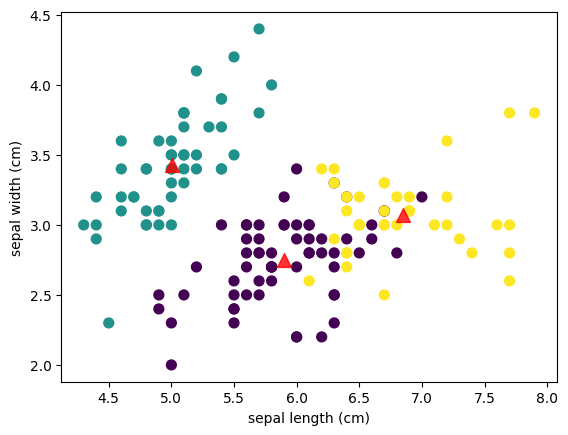

In [ ]:
plot_result(
    X = X_df.values,
    centers = kmeans.cluster_centers_,
    label = kmeans.labels_,
    feature_names = df.columns[:-1],
    dim1=0, dim2=1
    )

看一下不同變數間的分群結果

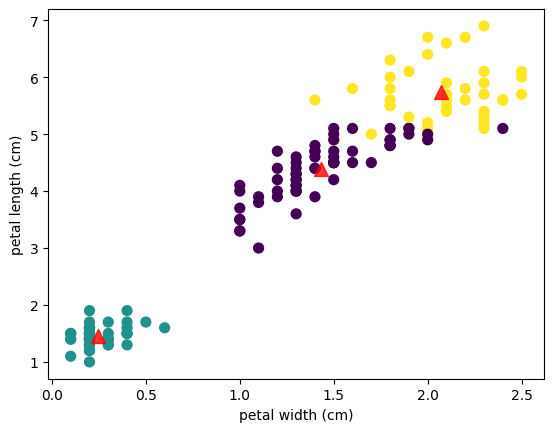

In [ ]:
plot_result(
    X = X_df.values,
    centers = kmeans.cluster_centers_,
    label = kmeans.labels_,
    feature_names = df.columns[:-1],
    dim1=3, dim2=2
    )

#### init centroid use k-means++
在本資料上因為樣本數較少，且資料比較單純。所以起始中心點的設置影響較少。

In [ ]:
kmeans = KMeans(
      init="k-means++",
      n_clusters=3,
      n_init='auto',
      random_state=42
)
kmeans.fit(X_df.values)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [ ]:
print('The lowest SSE value:', kmeans.inertia_, '\n')
print('Final locations of the centroid:\n', kmeans.cluster_centers_, '\n')
print('The number of iterations required to converge:', kmeans.n_iter_)

The lowest SSE value: 78.85566582597731 

Final locations of the centroid:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]] 

The number of iterations required to converge: 3


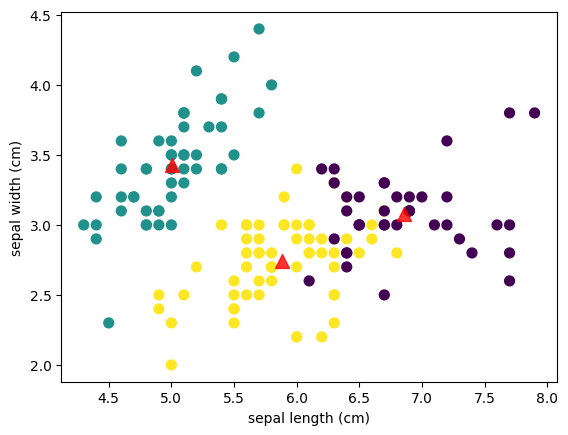

In [ ]:
plot_result(
    X = X_df.values,
    centers = kmeans.cluster_centers_,
    label = kmeans.labels_,
    feature_names = df.columns[:-1],
    dim1=0, dim2=1
    )

<p align="right">
    <a href='https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html'>
    source
    </a>
</p>

### K-Medoids  &nbsp; [<img width="1.2%" src="https://i.ibb.co/GJHbVbG/external-link.png">](https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html)


In [ ]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.1 MB/s eta 0:00:00


In [ ]:
from sklearn_extra.cluster import KMedoids

KMed = KMedoids(
    init="random",
    n_clusters=3,
    random_state=42)
KMed.fit(X_df.values)

KMedoids(init='random', n_clusters=3, random_state=42)

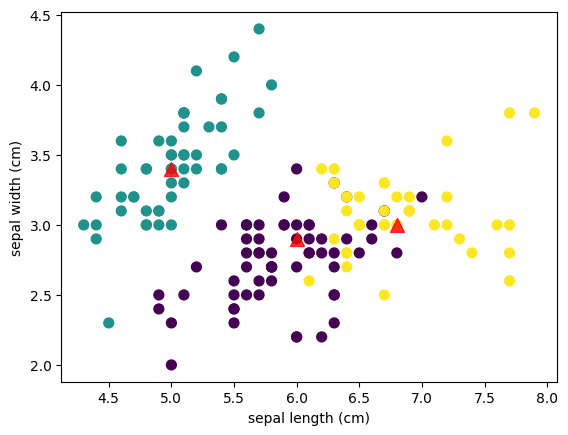

In [ ]:
plot_result(
    X = X_df.values,
    centers = KMed.cluster_centers_,
    label = KMed.labels_,
    feature_names = df.columns[:-1],
    dim1=0, dim2=1
    )

### K-Medoids vs. K-Means

K-Medoids和K-Means的差異僅有兩處，分別為中心點的選擇(K-means:虛擬點v.s K-medoids實際樣本點)和中心點決定的方式(K-Means:群內樣本的座標平均值v.s K-medoids: 群內距離和最小的樣本點)。由於決定中心點的方式不同，因此K-Medoids較不容易受到離群值的影響，且可以處理類別型資料，但運算量相對而言較大

<p align="right">
    <a href='https://ithelp.ithome.com.tw/m/articles/10301007'>
    source
    </a>
</p>


### 如何決定 k

#### **elbow method**
The quality of the cluster assignments is determined by computing the sum of the squared error (SSE) after the centroids converge, or match the previous iteration’s assignment. The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid. Since this is a measure of error, the objective of k-means is to try to minimize this value.

<p align="right">
    <a href='https://realpython.com/k-means-clustering-python/#how-to-perform-k-means-clustering-in-python'>
    source
    </a>
</p>

In [ ]:
from sklearn.cluster import KMeans

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_df.values)
    sse.append(kmeans.inertia_) # 預設就是 SSE

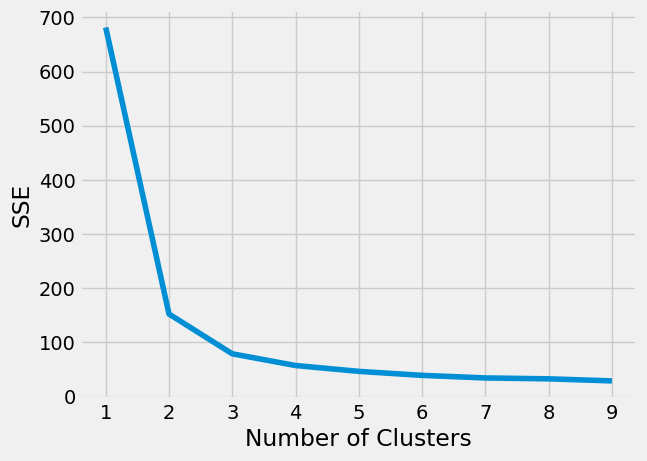

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

**kneed 套件** 可以直接計算最佳的 k   &nbsp; [<img width="1.2%" src="https://i.ibb.co/GJHbVbG/external-link.png">](https://kneed.readthedocs.io/en/stable/api.html#kneelocator)

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

kl = KneeLocator(
    range(1, 10), sse, curve="convex", direction="decreasing"
)

kl.elbow


2

<p align="right">
    <a href='https://realpython.com/k-means-clustering-python/#overview-of-clustering-techniques'>
    source
    </a>
</p>

#### **silhouette coefficient**   &nbsp; [<img width="1.2%" src="https://i.ibb.co/GJHbVbG/external-link.png">](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)
The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

1. How close the data point is to other points in the cluster
2. How far away the data point is from points in other clusters
Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In [ ]:
from sklearn.metrics import silhouette_score

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_df.values)
    score = silhouette_score(X_df.values, kmeans.labels_)
    silhouette_coefficients.append(score)

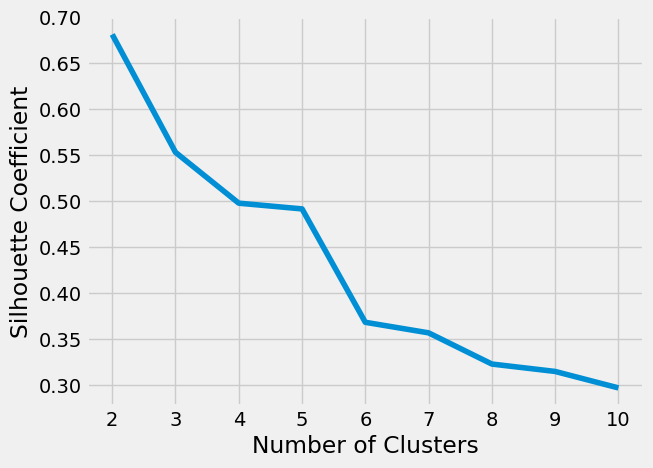

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

<p align="right">
    <a href='https://realpython.com/k-means-clustering-python/#overview-of-clustering-techniques'>
    source
    </a>
</p>

## **Hierarchical Method**

<p align="center">
    <img src="https://i.ibb.co/bKLNhVp/topic4-1-Hierarchical-Method.png" width="90%"/>
</p>

<p align="right">
    <a href='https://developers.google.com/machine-learning/clustering/clustering-algorithms?hl=zh-tw'>
    source
    </a>
</p>

層次聚類通過構建層次結構來確定聚類分配，基本上他可以分的組數是固定的，是基於演算法跑完後的階層狀態決定，透過指定不同階層可以將資料分成不同組數。這種方法每次跑出來的結果是一樣的，所以是很穩定的。

## 優點

- 除了分群結果外，他可以透過不同階層更深入看到資料群之間的關係。
- 可以用樹狀圖展示結果，可解釋性佳。

## 缺點

- 時間複雜度高，缺乏擴展性。
- 對雜訊 (noise) 和極端值 (outliers)較敏感。


<p align="right">
    <a href='https://realpython.com/k-means-clustering-python/#overview-of-clustering-techniques'>
    source
    </a>
</p>

### 兩種方法

#### **Agglomerative Approach**
凝聚聚類方法是自下而上(bottom-up)，它合併最相似的兩個點，直到所有點都合併到一個集群中。

<p align="center">
    <img src="https://i.ibb.co/wJMywyY/topic4-1-Hierarchical-Method-Agglomerative-Approach.png" width="60%"/>
</p>

<p align="right">
    <a href='https://www.geeksforgeeks.org/ml-hierarchical-clustering-agglomerative-and-divisive-clustering/'>
    source
    </a>
</p>



#### **Divisive clustering**
分裂聚類方法是自上而下(top-down)。它從所有點作為一個集群開始，並在每一步拆分最不相似的集群，直到只剩下單個數據點。

<p align="center">
    <img src="https://i.ibb.co/X76CRVm/topic4-1-Hierarchical-Method-Divisive-clustering.png" width="60%"/>
</p>

<p align="right">
    <a href='https://www.geeksforgeeks.org/ml-hierarchical-clustering-agglomerative-and-divisive-clustering/'>
    source
    </a>
</p>

### 合併兩群資料時可以基於不同方式   &nbsp; [<img width="1.2%" src="https://i.ibb.co/GJHbVbG/external-link.png">](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)

這邊使用 scipy 的 linkage & dendrogram 可以快速視覺化結果。其中，scipy 的 dendrogram 也可以結合 sklearn 的 AgglomerativeClustering 方法做視覺化，但因為是不同套件會比較麻煩， 有興趣可以參考 [這篇](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html)。

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

#### **Single linkage(最小連接法)**

<p align="center">
    <img src="https://i.ibb.co/zhCVVZv/topic4-1-Single-linkage.png" width="60%"/>
</p>

<p align="right">
    <a href='https://www.datacamp.com/tutorial/introduction-hierarchical-clustering-python'>
    source
    </a>
</p>

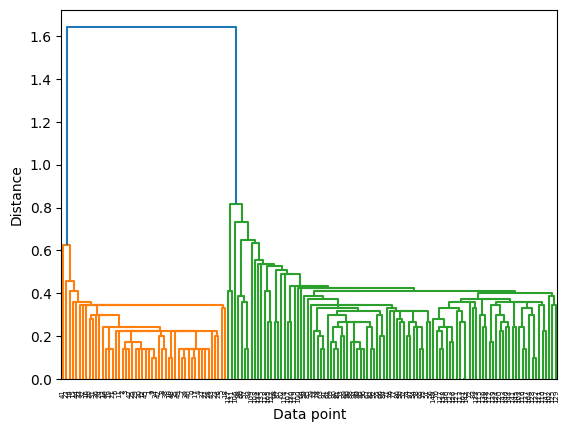

In [ ]:
plt.clf()
linkage_data = linkage(X_df, method='single', metric='euclidean')
dendrogram(linkage_data)
plt.xlabel('Data point')
plt.ylabel('Distance')

plt.show()

#### **Complete linkage(最大連接法)**

<p align="center">
    <img src="https://i.ibb.co/6XLqFdb/topic4-1-Complete-linkage.png" width="60%"/>
</p>

<p align="right">
    <a href='https://www.datacamp.com/tutorial/introduction-hierarchical-clustering-python'>
    source
    </a>
</p>

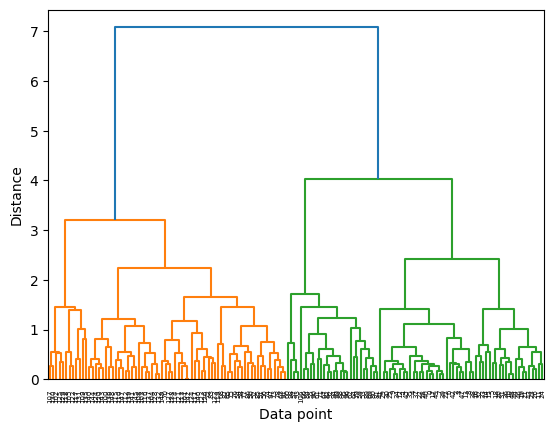

In [ ]:
plt.clf()
linkage_data = linkage(X_df, method='complete', metric='euclidean')
dendrogram(linkage_data)
plt.xlabel('Data point')
plt.ylabel('Distance')

plt.show()

#### **Average linkage(平均連接法)**

<p align="center">
    <img src="https://i.ibb.co/TKXK8kS/topic4-1-Average-linkage.png" width="60%"/>
</p>

<p align="right">
    <a href='https://www.datacamp.com/tutorial/introduction-hierarchical-clustering-python'>
    source
    </a>
</p>

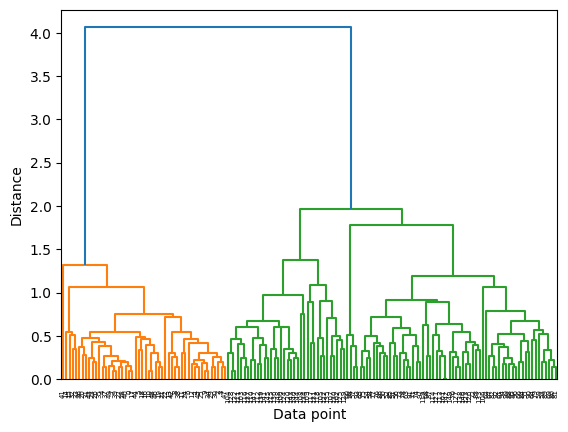

In [ ]:
plt.clf()
linkage_data = linkage(X_df, method='average', metric='euclidean')
dendrogram(linkage_data)
plt.xlabel('Data point')
plt.ylabel('Distance')

plt.show()

#### **ward**

它指定兩個聚類之間的距離，計算平方和誤差 （ESS），並根據較小的 ESS 連續選擇下一個聚類。目的是最大限度地減少每一步ESS的增加。因此，將錯誤降至最低。

<p align="center">
    <img src="https://i.ibb.co/kDVT1M4/topic4-1-ward.png" width="70%"/>
</p>

<p align="right">
    <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>
    source
    </a>
</p>


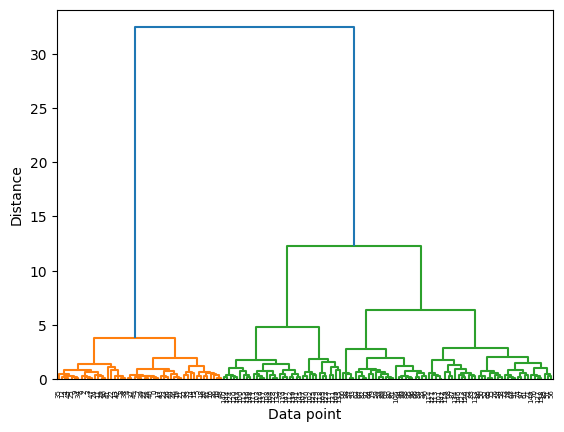

In [ ]:
plt.clf()
linkage_data = linkage(X_df, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.xlabel('Data point')
plt.ylabel('Distance')

plt.show()

### 距離(相似度)的計算
這部分讓同學有基本概念，就不一 一實作，有興趣的人可以自行測試不同距離的計算方式。

1. Euclidean
2. Manhattan

<p align="center">
    <img src="https://i.ibb.co/Rvw8GKp/topic4-1-Manhattan.png" width="40%"/>
</p>

<p align="right">
    <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>
    source
    </a>
</p>

3. Minkowski

<p align="center">
    <img src="https://i.ibb.co/NFLG71j/topic4-1-Minkowski.png" width="50%"/>
</p>

<p align="right">
    <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>
    source
    </a>
</p>

4. Cosine

<p align="center">
    <img src=https://i.ibb.co/ZVC9S5r/topic4-1-Cosine.png" width="80%"/>
</p>

<p align="right">
    <a href='https://blog.csdn.net/qq_42067550/article/details/105921912'>
    source
    </a>
</p>

5. Jaccard

<p align="center">
    <img src="https://i.ibb.co/3TR5F88/topic4-1-Jaccard.png" width="50%"/>
</p>

<p align="right">
    <a href=https://datascienceparichay.com/article/jaccard-similarity-python/'>
    source
    </a>
</p>

6. ...


### 實作   &nbsp; [<img width="1.2%" src="https://i.ibb.co/GJHbVbG/external-link.png">](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)

Agglomerative & Divisive 兩演算法結果基本上差異不大，實作的部分就統一使用 sklearn 提供的 AgglomerativeClustering 實作。而上面介紹這幾種合併兩群的方法，對分群結果影響較大。

In [ ]:
from sklearn.cluster import AgglomerativeClustering

def plot_hierarchical_result(X,label, feature_names, dim1=0, dim2=1):
    plt.clf()
    plt.scatter(X[:, dim1], X[:, dim2], c=label, s=50, cmap='viridis')
    plt.xlabel(feature_names[dim1])
    plt.ylabel(feature_names[dim2])

#### single

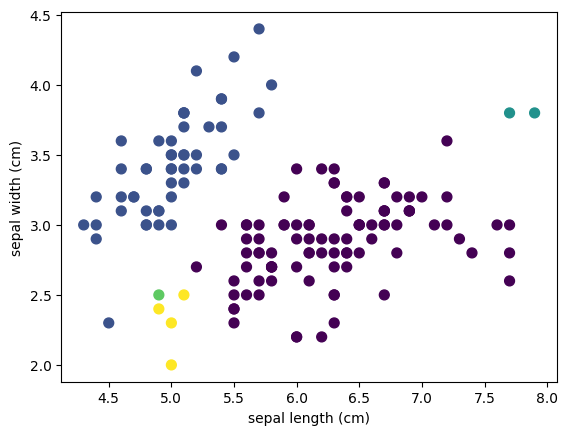

In [ ]:
clustering = AgglomerativeClustering(n_clusters=5, linkage='single').fit(X_df.values)

plot_hierarchical_result(X_df.values, clustering.labels_, X_df.columns, dim1=0, dim2=1)

#### ward


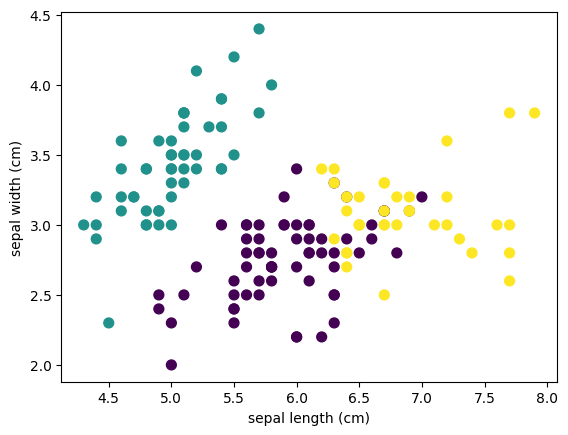

In [ ]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X_df.values)
plot_hierarchical_result(X_df.values, clustering.labels_, X_df.columns, dim1=0, dim2=1)

#### 分 5 組

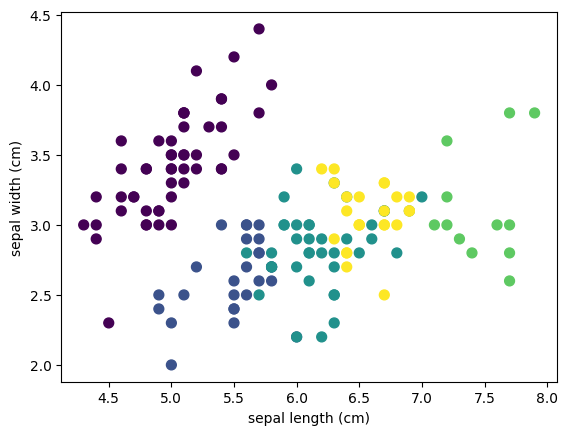

In [ ]:
clustering = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(X_df.values)

plot_hierarchical_result(X_df.values, clustering.labels_, X_df.columns, dim1=0, dim2=1)

#### 完整的階層樹

可以看到切到最後，每個資料點都變層獨立的一組。在實作上比較不會這樣做，只能視覺化使用。


In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward').fit(X_df.values)

In [ ]:
clustering.labels_

array([147, 131, 115, 136, 143,  85,  92, 148, 137, 146, 144,  97, 123,
        84, 105, 107, 132, 114, 101, 142,  98,  89, 119, 120, 135, 117,
       118,  67,  77, 141,  76, 138,  82,  78, 108, 129,  75, 111, 112,
       140, 128,  91,  94, 106, 121,  99, 116,  48,  81, 126, 104, 103,
        71,  59, 109,  90, 139,  69,  44,  93,  95, 145,  86, 130, 127,
        64, 122,  96,  52, 110,  47,  73,  70,  79,  58,  57, 149, 124,
        55, 133,  34, 113, 134,  42,  83, 125,  88,  63,  60,  45,  40,
        41,  51, 102,  61,  66, 100,  53,  65,  62,  80,  74,  28,  49,
        39,  50,  20,  24,  38,  68,  56,  29,  30,  46,  23,  36,  33,
        16,  54,  19,  27,  37,  22,  31,  87,   9,  43,  32,  72,  35,
        14,  21,  26,  17,  25,  18,  13,  11,  15,  10,  12,   5,   8,
         4,   6,   7,   3,   2,   1,   0])

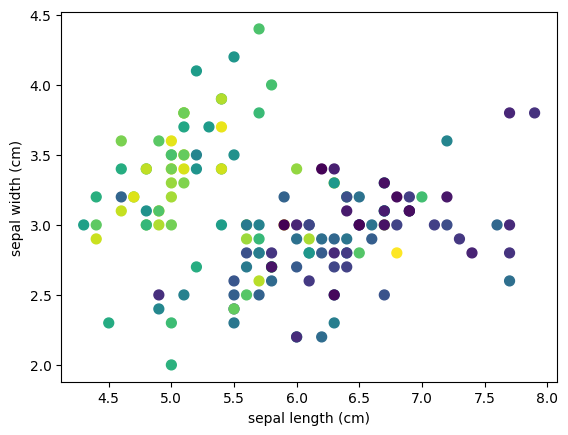

In [ ]:
plot_hierarchical_result(X_df.values, clustering.labels_, X_df.columns, dim1=0, dim2=1)


## Density-Based Method
<p align="center">
    <img src="https://i.ibb.co/CQNCyn5/topic4-1-Density-Clustering.png" width="60%"/>
</p>

<p align="right">
    <a href='https://developers.google.com/machine-learning/clustering/clustering-algorithms?hl=zh-tw'>
    source
    </a>
</p>


### DBSCAN   &nbsp; [<img width="1.2%" src="https://i.ibb.co/GJHbVbG/external-link.png">](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

<p align="center">
    <img src="https://i.ibb.co/vw51Mnw/topic4-1-DBSCAN.png" width="30%"/>
</p>

<p align="right">
    <a href='https://prutor.ai/dbscan-clustering-in-ml-density-based-clustering/'>
    source
    </a>
</p>


1. **核心點（core point）**: 在半徑 Eps 範圍內含有至少 MinPts 個點的點被視為核心點。核心點是高密度的證據，並且由核心點連接起來形成一個分群。
2. **邊界點（border point）**: 邊界點的 Eps 鄰域中包含的點少於 MinPts，但是它位於一個核心點的 Eps 鄰域內。也就是說，邊界點位於分群的邊緣。
3. **噪聲點（noise point）**: 既不是核心點也不是邊界點的點被視為噪聲點或異常點。這些點可能遠離其他點，或者位於兩個密度相近的分群之間。


**step:**

1. 找到 eps 內的所有鄰居點，找出核心點(core points)或訪問過的鄰居超過MinPts的點。
2. 對於每個核心點，如果它還沒有被分配到一個集群，創建一個新的集群。
3. 遞歸找到它所有的密度連通點，並將它們分配到與核心點相同的簇中。如果存在一個點 c，該點在其鄰居中有足夠數量的點，並且點 a 和 b 都在 eps 距離內，則稱點 a 和 b 是密度連通的。這是一個鏈接過程。因此，如果 b 是 c 的鄰居，c 是 d 的鄰居，d 是 e 的鄰居，e 又是 a 的鄰居，這意味著 b 是 a 的鄰居。
4. 遍歷數據集中剩餘的未訪問點。


In [ ]:
from sklearn.cluster import DBSCAN

def plot_dbscan_result(X, label, feature_names, dim1=0, dim2=1):
    plt.clf()

    fig, ax = plt.subplots()

    # 畫 noise
    if -1 in label:
        ax.scatter(
            X[label == -1, dim1],
            X[label == -1, dim2],
            c='gray',
            label='Noise',
            marker='+',
            s=50
            )

    # 畫 group
    cl_map = plt.get_cmap('Set3') # 'viridis' 在自訂顏色時比較不明顯
    for i in set(label[label != -1]):
        ax.scatter(
            X[label == i, dim1],
            X[label == i, dim2],
            color=cl_map(i%12), # set3 有12 顏色可以換
            label=f'group{i}',
            s=50
            )
    ax.set_xlabel(feature_names[dim1])
    ax.set_ylabel(feature_names[dim2])

    ax.legend()
    # ax.grid(True)
    plt.show()

#### **`eps` : 判斷是否為鄰近點的半徑大小**


`eps` 越大代表鄰近點判定越寬鬆，所以最後全部都被視為同一組

In [ ]:
dbscan_cluster = DBSCAN(eps=10, min_samples=9).fit_predict(X_df.values)
dbscan_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<Figure size 640x480 with 0 Axes>

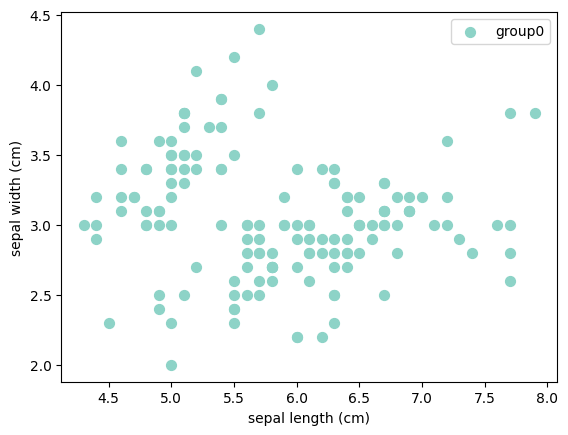

In [ ]:
plot_dbscan_result(X_df.values, dbscan_cluster, X_df.columns, dim1=0, dim2=1)

**eps = 1**

In [ ]:
dbscan_cluster = DBSCAN(eps=1, min_samples=9).fit_predict(X_df.values)
dbscan_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<Figure size 640x480 with 0 Axes>

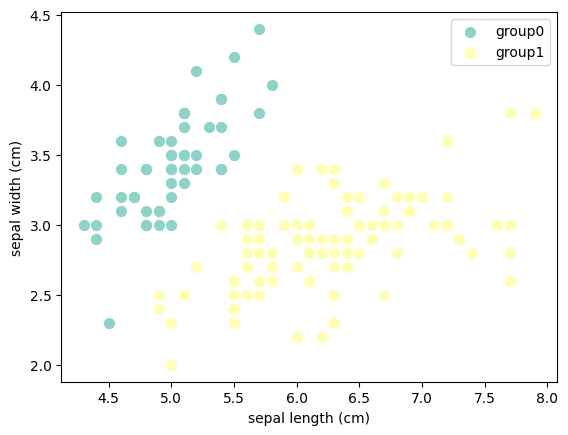

In [ ]:
plot_dbscan_result(X_df.values, dbscan_cluster, X_df.columns, dim1=0, dim2=1)

**eps = 0.6**

In [ ]:
dbscan_cluster = DBSCAN(eps=0.6, min_samples=9).fit_predict(X_df.values)
dbscan_cluster

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

<Figure size 640x480 with 0 Axes>

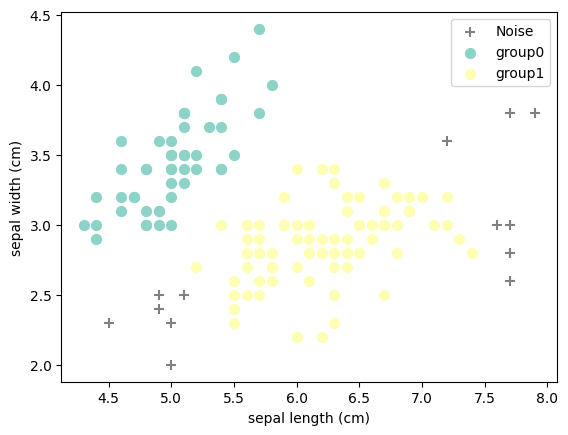

In [ ]:
plot_dbscan_result(X_df.values, dbscan_cluster, X_df.columns, dim1=0, dim2=1)

**eps = 0.4**

以 iris 的資料性質來看，大約 0.4 的效果較好，可以區分三種 species。

In [ ]:
dbscan_cluster = DBSCAN(eps=0.4, min_samples=9).fit_predict(X_df.values)
dbscan_cluster

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  2,
        2,  2,  1,  2,  1, -1, -1,  2,  1, -1,  1, -1, -1, -1,  2,  1,  1,
       -1,  1, -1,  1, -1, -1, -1,  2,  2,  2, -1, -1,  1, -1,  1, -1, -1,
       -1,  2, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

<Figure size 640x480 with 0 Axes>

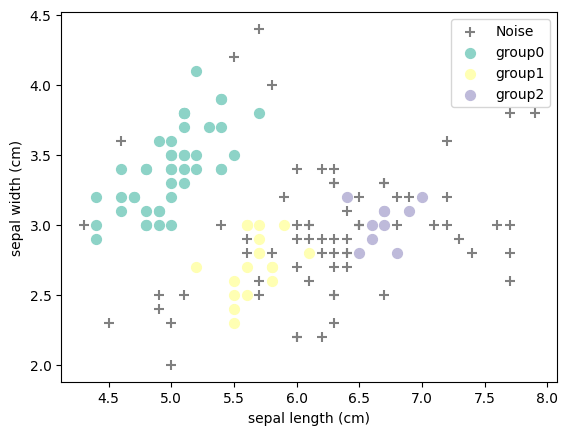

In [ ]:
plot_dbscan_result(X_df.values, dbscan_cluster, X_df.columns, dim1=0, dim2=1)

**eps = 0.2**

當 eps 低到一定程度後，基本上所有點都會視為 noise

In [ ]:
dbscan_cluster = DBSCAN(eps=0.2, min_samples=9).fit_predict(X_df.values)
dbscan_cluster

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

<Figure size 640x480 with 0 Axes>

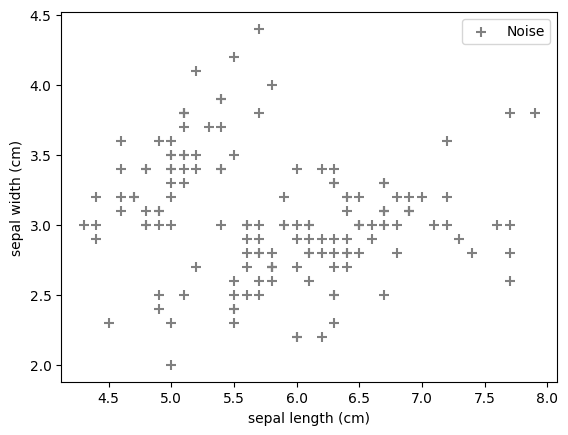

In [ ]:
plot_dbscan_result(X_df.values, dbscan_cluster, X_df.columns, dim1=0, dim2=1)

#### **`min_sample`: 至少需要幾個點可以形成一個 group**

**min_sample = 1**

很亂，完全無法偵測到 noise。(太多組別後面顏色不構)

<Figure size 640x480 with 0 Axes>

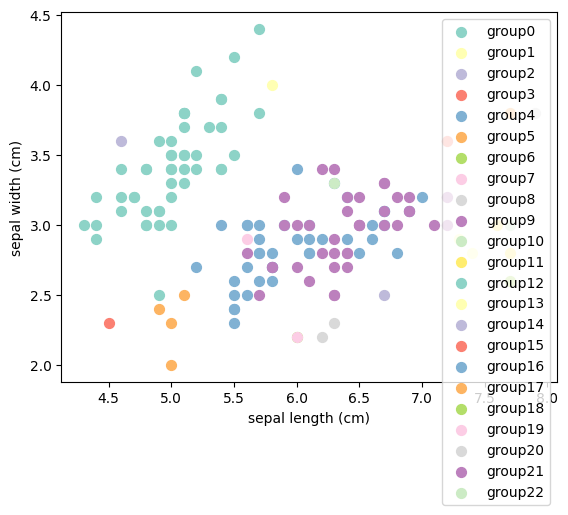

In [ ]:
dbscan_cluster = DBSCAN(eps=0.4, min_samples=1).fit_predict(X_df.values)
plot_dbscan_result(X_df.values, dbscan_cluster, X_df.columns, dim1=0, dim2=1)

**min_sample = 2**

<Figure size 640x480 with 0 Axes>

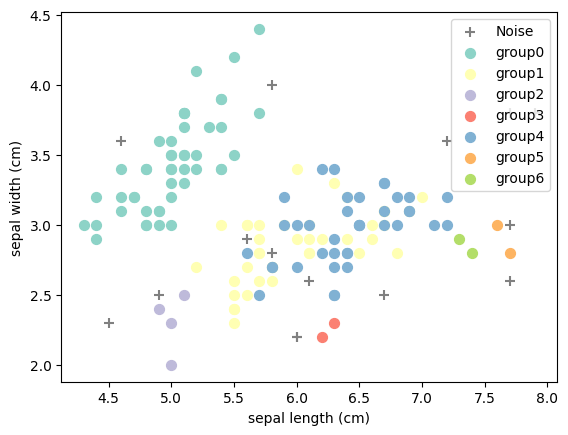

In [ ]:
dbscan_cluster = DBSCAN(eps=0.4, min_samples=2).fit_predict(X_df.values)
plot_dbscan_result(X_df.values, dbscan_cluster, X_df.columns, dim1=0, dim2=1)

**min_sample = 3**

<Figure size 640x480 with 0 Axes>

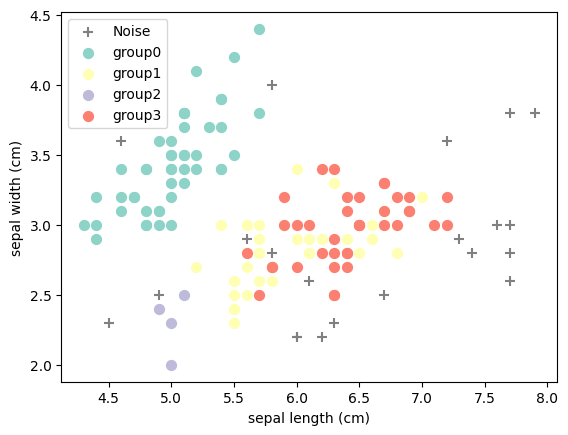

In [ ]:
dbscan_cluster = DBSCAN(eps=0.4, min_samples=3).fit_predict(X_df.values)
plot_dbscan_result(X_df.values, dbscan_cluster, X_df.columns, dim1=0, dim2=1)

**min_sample = 5**

<Figure size 640x480 with 0 Axes>

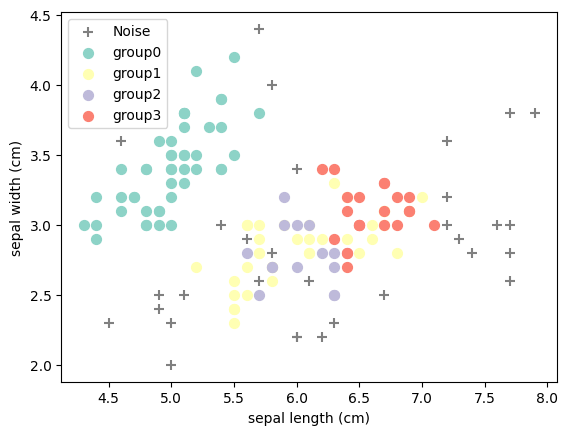

In [ ]:
dbscan_cluster = DBSCAN(eps=0.4, min_samples=5).fit_predict(X_df.values)
plot_dbscan_result(X_df.values, dbscan_cluster, X_df.columns, dim1=0, dim2=1)

**min_sample = 7**

<Figure size 640x480 with 0 Axes>

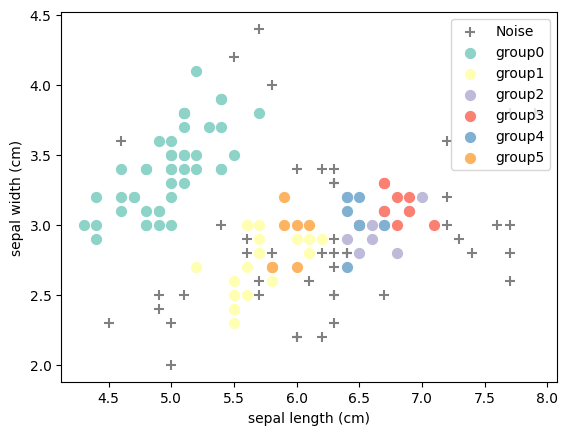

In [ ]:
dbscan_cluster = DBSCAN(eps=0.4, min_samples=7).fit_predict(X_df.values)
plot_dbscan_result(X_df.values, dbscan_cluster, X_df.columns, dim1=0, dim2=1)

**min_sample = 9**

<Figure size 640x480 with 0 Axes>

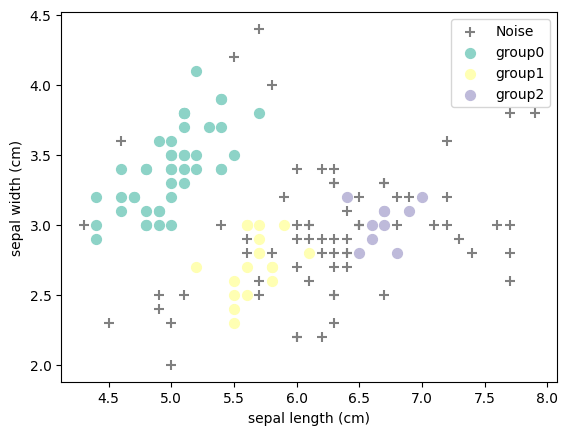

In [ ]:
dbscan_cluster = DBSCAN(eps=0.4, min_samples=9).fit_predict(X_df.values)
plot_dbscan_result(X_df.values, dbscan_cluster, X_df.columns, dim1=0, dim2=1)

# Part 2: 分群結果評估
這部分不會針對評估指標做詳細介紹，只是簡單讓大家知道，且會使用而已。

## 資料準備: 用 kmeans 結果為例

## 有標準答案
基於 `true label` & `kmean label` 的評估方式，前提是本身資料要有標籤。

**true label**: 真實標籤資料

In [ ]:
true_label, label_name = pd.factorize(df['species'])
print('true label:', true_label)
print('label name:', label_name)

true label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
label name: Index(['setosa', 'versicolor', 'virginica'], dtype='object')


**kmeans label**: kmeans 分群結果

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(
      init="random",
      n_clusters=3,
      n_init='auto',
      random_state=42
)
kmeans.fit(X_df.values)

kmean_label = kmeans.labels_
print('kmean label: ', kmean_label)

kmean label:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


確定兩者對應的 encode 是一樣的很重要 !!

In [ ]:
# 為了對應標準答案的 encode 這邊將 1 和 0 互換
kmean_label = np.array(list(map(lambda x: 1 if x == 0 else (0 if x == 1 else x), kmean_label)))
kmean_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

### Rand Index (RI)   [<img width="1.2%" src="https://i.ibb.co/GJHbVbG/external-link.png">](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.rand_score.html) 、ARI(adjusted Rand index)  [<img width="1.2%" src="https://i.ibb.co/GJHbVbG/external-link.png">](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)

<aside>
Rand Index (RI, ARI) measures the similarity between the cluster assignments by making pair-wise comparisons. A higher score signifies higher similarity.
</aside>



In [ ]:
from sklearn.metrics import rand_score, adjusted_rand_score

RI = rand_score(true_label, kmean_label)
ARI = adjusted_rand_score(true_label, kmean_label)

print('RI:', RI)
print('ARI:', ARI)

RI: 0.8797315436241611
ARI: 0.7302382722834697


<p align="right">
    <a href='https://towardsdatascience.com/7-evaluation-metrics-for-clustering-algorithms-bdc537ff54d2'>
    source
    </a>
</p>

### Mutual Information (MI &nbsp; [<img width="1.2%" src="https://i.ibb.co/GJHbVbG/external-link.png">](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mutual_info_score.html), NMI &nbsp; [<img width="1.2%" src="https://i.ibb.co/GJHbVbG/external-link.png">](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html), AMI&nbsp; [<img width="1.2%" src="https://i.ibb.co/GJHbVbG/external-link.png">](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html))


<aside>
Mutual Information (MI, NMI, AMI) measures the agreement between the cluster assignments. A higher score signifies higher similarity.
</aside>

In [ ]:
from sklearn.metrics import (
    mutual_info_score,
    normalized_mutual_info_score,
    adjusted_mutual_info_score,
)

MI = mutual_info_score(true_label, kmean_label)
NMI = normalized_mutual_info_score(true_label, kmean_label)
AMI = adjusted_mutual_info_score(true_label, kmean_label)

print('MI:', MI)
print('NMI:', NMI)
print('AMI:', AMI)

MI: 0.8255910976103356
NMI: 0.7581756800057784
AMI: 0.7551191675800485


<p align="right">
    <a href='https://towardsdatascience.com/7-evaluation-metrics-for-clustering-algorithms-bdc537ff54d2'>
    source
    </a>
</p>

### V-measure (homogeneity [<img width="1.2%" src="https://i.ibb.co/GJHbVbG/external-link.png">](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html)、 completeness  [<img width="1.2%" src="https://i.ibb.co/GJHbVbG/external-link.png">](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html)、v-measure [<img width="1.2%" src="https://i.ibb.co/GJHbVbG/external-link.png">](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html))

<aside>
V-measure measures the correctness of the cluster assignments using conditional entropy analysis. A higher score signifies higher similarity.
</aside>

In [ ]:
from sklearn.metrics import (
    homogeneity_score,
    completeness_score,
    v_measure_score,
)

HS = homogeneity_score(true_label, kmean_label)
CS = completeness_score(true_label, kmean_label)
V = v_measure_score(true_label, kmean_label, beta=1.0)

print('HS:', HS)
print('CS:', CS)
print('V:', V)

HS: 0.7514854021988338
CS: 0.7649861514489815
V: 0.7581756800057784


<p align="right">
    <a href='https://towardsdatascience.com/7-evaluation-metrics-for-clustering-algorithms-bdc537ff54d2'>
    source
    </a>
</p>

###  Fowlkes-Mallows Scores [<img width="1.2%" src="https://i.ibb.co/GJHbVbG/external-link.png">](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html)

<aside>
Fowlkes-Mallows Scores measure the correctness of the cluster assignments using pairwise precision and recall. A higher score signifies higher similarity.
</aside>

<p align="center">
    <img src="https://i.ibb.co/FWmbwtX/topic4-1-Fowlkes-Mallows-Scores-table.png" width="60%"/>
</p>

<p align="center">
    <img src="https://i.ibb.co/DtsYzzL/topic4-1-Fowlkes-Mallows-Scores.png" width="40%"/>
</p>

<p align="right">
    <a href='https://towardsdatascience.com/7-evaluation-metrics-for-clustering-algorithms-bdc537ff54d2'>
    source
    </a>
</p>


In [ ]:
from sklearn.metrics import fowlkes_mallows_score


FMI = fowlkes_mallows_score(true_label, kmean_label)
print('FMI:', FMI)

FMI: 0.8208080729114153


<p align="right">
    <a href='https://towardsdatascience.com/7-evaluation-metrics-for-clustering-algorithms-bdc537ff54d2'>
    source
    </a>
</p>

### 一般分類的評估指標: accuracy、recall、Precision、F1-score

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(true_label, kmean_label, target_names=label_name))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.77      0.96      0.86        50
   virginica       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



##  沒標準答案

基於 `資料本身` & `kmean label` 的評估方式，適合沒有標籤的資料。
有時候在有標籤的情況下分群出來的結果和真實標籤結果差異較大，不一定代表分群分的不好，也有可能是資料本身的資訊不足以區分所有真實標籤。而分群演算法只是基於資料原本的狀況得出的結果，這時候可以用這類方法去評估結果。


**data**: 本身的特徵資料

In [ ]:
data = X_df.values
data[:10] # 只看前 10 筆

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

**kmeans label**: kmeans 分群結果

### silhouette score [<img width="1.2%" src="https://i.ibb.co/GJHbVbG/external-link.png">](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

<aside>
Silhouette Coefficient measures the between-cluster distance against within-cluster distance. A higher score signifies better-defined clusters.
</aside>

<p align="center">
    <img src="https://i.ibb.co/VMKn1YV/silhouette-score.png" width="60%"/>
</p>

<p align="center">
    <img src="https://i.ibb.co/dMWB87t/silhouette-score-f.png" width="40%"/>
</p>

<p align="right">
    <a href='https://www.researchgate.net/figure/Silhouette-coefficient-example_fig2_272017073'>
    source
    </a>
</p>



In [ ]:
from sklearn.metrics import silhouette_score

s = silhouette_score(data, kmean_label, metric="euclidean")

print('silhouette score:', s)

silhouette score: 0.5528190123564095


<p align="right">
    <a href='https://towardsdatascience.com/7-evaluation-metrics-for-clustering-algorithms-bdc537ff54d2'>
    source
    </a>
</p>

### Calinski-Harabasz Index [<img width="1.2%" src="https://i.ibb.co/GJHbVbG/external-link.png">](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html)



<aside>
Calinski-Harabasz Index measures the between-cluster dispersion against within-cluster dispersion. A higher score signifies better-defined clusters.
</aside>

In [ ]:
from sklearn.metrics import calinski_harabasz_score

chs = calinski_harabasz_score(data, kmean_label)
print('calinski harabasz score:', chs)

calinski harabasz score: 561.62775662962


<p align="right">
    <a href='https://towardsdatascience.com/7-evaluation-metrics-for-clustering-algorithms-bdc537ff54d2'>
    source
    </a>
</p>

### Davies-Bouldin Index [<img width="1.2%" src="https://i.ibb.co/GJHbVbG/external-link.png">](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html)


<aside>
Davies-Bouldin Index measures the size of clusters against the average distance between clusters. A lower score signifies better-defined clusters.
</aside>


In [ ]:
from sklearn.metrics import davies_bouldin_score

DB = davies_bouldin_score(data, kmean_label)
print('davies bouldin score:', DB)

davies bouldin score: 0.6619715465007465


<p align="right">
    <a href='https://towardsdatascience.com/7-evaluation-metrics-for-clustering-algorithms-bdc537ff54d2'>
    source
    </a>
</p>

# 補充

## 分群演算法比較表

<p align="center">
    <img src="https://i.ibb.co/HhGSwkt/topic4-1-comparison-cluster.png" width="90%"/>
</p>


<p align="right">
    <a href='https://www.tibco.com/reference-center/what-is-cluster-analysis'>
    source
    </a>
</p>



## 評估指標比較表





<p align="center">
    <img src="https://i.ibb.co/HhGSwkt/topic4-1-comparison-cluster.png" width="90%"/>
</p>


<p align="right">
    <a href='https://towardsdatascience.com/7-evaluation-metrics-for-clustering-algorithms-bdc537ff54d2'>
    source
    </a>
</p>



# 建議學習資源
- [Clustering methods - comprehensive study | Kaggle](https://www.kaggle.com/code/marcinrutecki/clustering-methods-comprehensive-study)
    - 介紹許多常用的的分群方法，寫得很詳細，還包含各方法的優缺點。

- cluster 應用在不同資料上
    - [Text Clustering | Kaggle](https://www.kaggle.com/code/karthik3890/text-clustering)

    - [Introduction to Time Series Clustering | Kaggle](https://www.kaggle.com/code/izzettunc/introduction-to-time-series-clustering)



# 今天的練習 💪
### 作業內容
請每位同學建立一個新的 colab notebook。 實作下面題目:

1. 實作 3 種不同分群方法(Partitioning Method、
Hierarchical Method、Density-Based Method)，各選一種。
2. 將 3 種分群的結果分別轉換成預測類別，並和 label 計算 confusion matrix 並使用熱圖視覺化。(如下圖)
3. 評估 3 種分群方法的預測結果，並比較三種不同的分群方式在本次任務下誰的效果較好。(有 label 或無 label 的評估方式都要有)


<p align="center">
    <img src="https://i.ibb.co/8KKGy4w/topic4-ex-confusion-matrix.png" width="75%"/>
</p>



<font color="#48C9B0">資料集</font>

[Dataset of songs in Spotify (kaggle.com)](https://www.kaggle.com/datasets/mrmorj/dataset-of-songs-in-spotify)
- **label**: genre (音樂風格) 👉 不作為分群特徵，只用在評估。
- **feature**:
    - **音樂特徵**: Danceability, Energy, Key, Loudness, Mode, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Time Signature
    - **其他特徵**: duration_ms(時間長度)、 time_signature(拍子記號)。

*p.s: 如果遇到 ram 問題，可以降低資料數量(pandas - sample)*

<!-- [Find Open Datasets and Machine Learning Projects |  Kaggle](https://www.kaggle.com/datasets?search=Clustering&sort=votes&minUsabilityRating=9.00+or+higher)
- search: Clustering
- sort: Most Votes
- Usability Rating: >=9
- data size(options): < 500 mb -->

<font color="#48C9B0">注意</font>
- 可以直接複製別人程式碼，但須標明來源。
- 整個過程須自己理解並加上自己的敘述。

### 作業繳交方式
> *作業完成後與 colab 的左上角，檔案 → 列印 → 另存為 PDF，並將  colab notebook 的 PDF 檔上傳到 moodle。如果有視覺化無法在 PDF 上顯示，可以附上 colab 共享連結。*





# reference
- Cluster Analysis
    - [2.3. Clustering — scikit-learn 1.2.2 documentation](https://scikit-learn.org/stable/modules/clustering.html)

    - [What is Cluster Analysis? | TIBCO Software](https://www.tibco.com/reference-center/what-is-cluster-analysis)

    - [Data Mining - Cluster Analysis - GeeksforGeeks](https://www.geeksforgeeks.org/data-mining-cluster-analysis/)

    - [K-Means Clustering in Python: A Practical Guide – Real Python](https://realpython.com/k-means-clustering-python/#overview-of-clustering-techniques)

    - [10 Clustering Algorithms With Python - MachineLearningMastery.com](https://machinelearningmastery.com/clustering-algorithms-with-python/)

    - [Cluster Analysis: Definition and Methods - Qualtrics](https://www.qualtrics.com/experience-management/research/cluster-analysis/)

    - [Hierarchical Clustering | Hierarchical Clustering Python (analyticsvidhya.com)](https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/)

    - [An Introduction to Hierarchical Clustering in Python | DataCamp](https://www.datacamp.com/tutorial/introduction-hierarchical-clustering-python)

    - [Python Machine Learning - Hierarchical Clustering (w3schools.com)](https://www.w3schools.com/python/python_ml_hierarchial_clustering.asp)

    - [7 Evaluation Metrics for Clustering Algorithms | by Kay Jan Wong | Towards Data Science](https://towardsdatascience.com/7-evaluation-metrics-for-clustering-algorithms-bdc537ff54d2)

    - [Popular Unsupervised Clustering Algorithms | Kaggle](https://www.kaggle.com/code/fazilbtopal/popular-unsupervised-clustering-algorithms)
- Dataset
    - [Customer Personality Analysis | Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)
    - [Coffee Quality Data (CQI May-2023) | Kaggle](https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi)



<!--
- 特徵工程
    - [Creating Features and K-Means Clustering in Feature Engineering | by Abhinaba Banerjee | DataDrivenInvestor](https://medium.datadriveninvestor.com/creating-features-and-k-means-clustering-in-feature-engineering-112c61d55231)

    - [How to create New Features using Clustering!! | by Gowtham Dongari | Towards Data Science](https://towardsdatascience.com/how-to-create-new-features-using-clustering-4ae772387290)

    - [Using clustering for feature engineering on the Iris Dataset | by Arunabh | GreyAtom | Medium](https://medium.com/greyatom/using-clustering-for-feature-engineering-on-the-iris-dataset-f438366d0b4b)

    - [Kmeans as Feature Engineering Form (deepnote.com)](https://deepnote.com/@mohammed-emad/Kmeans-as-Feature-Engineering-Form-a65686d0-b658-4297-aeb4-c60da52aab97)
 -->
